In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
ds = xr.open_mfdataset('/Volumes/UnionSine/Data_Transfer/2.6/pH_Baseline/*.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
ds_oae = xr.open_mfdataset('/Volumes/UnionSine/Data_Transfer/2.6/pH_OAE/*.nc')

### EU Seasonal Average of pH

In [7]:
sliced_data_baseline = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 10) & (40 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_data_oae = ds_oae.where((-25 < ds_oae.nav_lon) & (ds_oae.nav_lon < 10) & (40 < ds_oae.nav_lat) & (ds_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [15]:
sliced_data_baseline.to_netcdf('/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/ph_baseline_2.6_cropped.nc')
# sliced_data_oae.to_netcdf('/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/ph_OAE_2.6_cropped.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/conventions.py:449: UserWarning:

Variable 'time_counter' has datetime type and a bounds variable but time_counter.encoding does not have units specified. The units encodings for 'time_counter' and 'time_counter_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time_counter' before writing to a file.



In [10]:
sliced_data_baseline_plot = sliced_data_baseline.ph.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.ph.mean(dim=('y', 'x'))

In [11]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

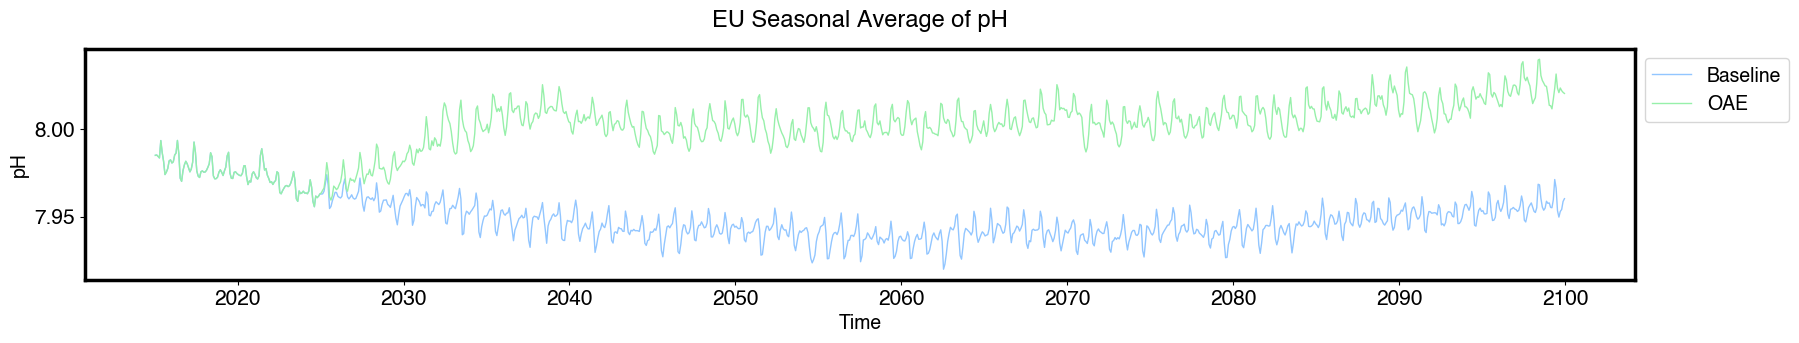

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ph, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ph, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of pH', fontsize=17, y=1.06)
plt.show()

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline.ph.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.ph.mean(dim=('y', 'x'))

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ph, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ph, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of pH

In [ ]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_flux_baseline = sliced_data_baseline["ph"].sel(time_counter=slice(start_date, end_date))

In [ ]:
ph_season_summary_baseline = ph_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_baseline = ph_flux_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_baseline = ph_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [ ]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_flux_oae = sliced_data_oae["ph"].sel(time_counter=slice(start_date, end_date))

In [ ]:
ph_season_summary_oae = ph_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_oae = ph_flux_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_oae = ph_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

In [ ]:
f, ax = plt.subplots(figsize=(20, 3))
ph_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black",
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of pH

In [ ]:
# weighted mean

month_length_baseline = ph_flux_baseline.time_counter.dt.days_in_month
ph_weighted_mean_baseline = ((ph_flux_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_baseline = ph_weighted_mean_baseline.where(ph_weighted_mean_baseline)
ph_weighted_season_baseline = ph_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [ ]:
# weighted mean 

month_length_oae = ph_flux_oae.time_counter.dt.days_in_month
ph_weighted_mean_oae = ((ph_flux_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_oae = ph_weighted_mean_oae.where(ph_weighted_mean_oae)

In [ ]:
ph_weighted_season_oae = ph_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

In [ ]:
f, ax = plt.subplots(figsize=(20, 3))
ph_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black",
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of pH (seasons displayed)

In [ ]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in ph_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(7.92, 8.05)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)

for month, arr in ph_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(7.92, 8.05)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('pH', fontsize=14)
f.tight_layout()
plt.show()

In [ ]:
ph_weighted_baseline = ph_weighted_season_baseline.to_dataframe('pH')
ph_weighted_baseline['Month'] = pd.DatetimeIndex(ph_weighted_baseline.index).month

In [ ]:
conditions = [
    (ph_weighted_baseline['Month'] == 3),
    (ph_weighted_baseline['Month'] == 6),
    (ph_weighted_baseline['Month'] == 9),
    (ph_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_baseline['Month'] = np.select(conditions, values)

In [ ]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

### Weighted EU Seasonal Average of pH without OAE (seasons displayed)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.pH, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.pH, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

In [ ]:
ph_weighted_oae = ph_weighted_season_oae.to_dataframe('pH')
ph_weighted_oae['Month'] = pd.DatetimeIndex(ph_weighted_oae.index).month

In [ ]:
conditions = [
    (ph_weighted_oae['Month'] == 3),
    (ph_weighted_oae['Month'] == 6),
    (ph_weighted_oae['Month'] == 9),
    (ph_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_oae['Month'] = np.select(conditions, values)

In [ ]:
colors = dict(zip(ph_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

### Weighted EU Seasonal Average of pH with OAE (seasons displayed)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.pH, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.pH, color=ph_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

## Weighted EU Seasonal Average of pH (seasons displayed)

In [ ]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.pH, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.pH, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.pH, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.pH, color=ph_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend,  bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)
ax.set_ylim(7.92, 8.05)

pass

### EU Monthly Averaged pH for the last ten years

In [ ]:
mean_baseline = (sliced_frame_baseline.ph.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ph.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [ ]:
mean_oae = (sliced_frame_oae.ph.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).ph.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.ph, label='Baseline')
plt.plot(mean_oae.ph, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10, fontname="Helvetica")
plt.ylabel("pH", fontsize=10, fontname="Helvetica")
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Monthly Averaged pH', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### Map of EU Seasonal Average of pH without OAE

In [ ]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [ ]:
weights_baseline = weights_baseline.to_dataset()

In [ ]:
ds_weighted_baseline = (sliced_frame_baseline.ph * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='ph')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [ ]:
notnull = pd.notnull(ds_unweighted_baseline["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.94,
        vmax=8.04,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.94,
        vmax=8.04,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.00015,
        vmax=0.00015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of pH with OAE

In [ ]:
ds_weighted_oae 

In [ ]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [ ]:
weights_oae = weights_oae.to_dataset()

In [ ]:
ds_weighted_oae = (sliced_frame_oae.ph * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='ph')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [ ]:
notnull = pd.notnull(ds_unweighted_oae["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.94,
        vmax=8.09,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.94,
        vmax=8.09,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.00015,
        vmax=0.00015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

In [ ]:
ph_flux_baseline_explore = ph_flux_baseline.to_dataframe()
ph_flux_baseline_explore = ph_flux_baseline_explore.describe()

In [ ]:
ph_flux_oae_explore = ph_flux_oae.to_dataframe()
ph_flux_oae_explore = ph_flux_oae_explore.describe()

In [ ]:
ph_weighted_baseline_explore = ph_weighted_baseline.describe()

In [ ]:
ph_weighted_oae_explore = ph_weighted_oae.describe()

### EU Monthly Average of pH 

In [ ]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

ph_baseline_month = sliced_data_baseline["ph"].sel(time_counter=slice(start_date_month, end_date_month))

In [ ]:
ph_month_summary_baseline = ph_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_month_mean_all_years_baseline = ph_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
ph_monthly_mean_baseline = ph_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [ ]:
ph_oae_month = sliced_data_oae["ph"].sel(time_counter=slice(start_date_month, end_date_month))

In [ ]:
ph_month_summary_oae = ph_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_month_mean_all_years_oae = ph_oae_month.resample(time_counter='M').mean(keep_attrs=True)
ph_monthly_mean_oae = ph_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

In [ ]:
f, ax = plt.subplots(figsize=(20, 3))

ph_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of pH", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of pH without OAE (months displayed)

In [ ]:
ph_baseline_monthly = ph_monthly_mean_baseline.to_dataframe('ph')
ph_baseline_monthly['Month'] = pd.DatetimeIndex(ph_baseline_monthly.index).month

In [ ]:
conditions = [
    (ph_baseline_monthly['Month'] == 1),
    (ph_baseline_monthly['Month'] == 2),
    (ph_baseline_monthly['Month'] == 3),
    (ph_baseline_monthly['Month'] == 4),
    (ph_baseline_monthly['Month'] == 5),
    (ph_baseline_monthly['Month'] == 6),
    (ph_baseline_monthly['Month'] == 7),
    (ph_baseline_monthly['Month'] == 8),
    (ph_baseline_monthly['Month'] == 9),
    (ph_baseline_monthly['Month'] == 10),
    (ph_baseline_monthly['Month'] == 11),
    (ph_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_baseline_monthly['Month'] = np.select(conditions, values)

In [ ]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("EU Monthly Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of pH with OAE (months displayed)

In [ ]:
ph_oae_monthly = ph_monthly_mean_oae.to_dataframe('ph')
ph_oae_monthly['Month'] = pd.DatetimeIndex(ph_oae_monthly.index).month

In [ ]:
conditions = [
    (ph_oae_monthly['Month'] == 1),
    (ph_oae_monthly['Month'] == 2),
    (ph_oae_monthly['Month'] == 3),
    (ph_oae_monthly['Month'] == 4),
    (ph_oae_monthly['Month'] == 5),
    (ph_oae_monthly['Month'] == 6),
    (ph_oae_monthly['Month'] == 7),
    (ph_oae_monthly['Month'] == 8),
    (ph_oae_monthly['Month'] == 9),
    (ph_oae_monthly['Month'] == 10),
    (ph_oae_monthly['Month'] == 11),
    (ph_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_oae_monthly['Month'] = np.select(conditions, values)

In [ ]:
colors = dict(zip(ph_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("EU Monthly Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of pH (months displayed)

In [ ]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH", fontsize=15, y=1.06)

pass

### Δ pH between Baseline and OAE

In [ ]:
delta_ph = ph_oae_monthly.ph - ph_baseline_monthly.ph

In [ ]:
delta_ph = delta_ph.to_xarray()

In [ ]:
delta_ph = delta_ph.to_dataframe('ph')
delta_ph['Month'] = pd.DatetimeIndex(delta_ph.index).month

In [ ]:
conditions = [
    (delta_ph['Month'] == 1),
    (delta_ph['Month'] == 2),
    (delta_ph['Month'] == 3),
    (delta_ph['Month'] == 4),
    (delta_ph['Month'] == 5),
    (delta_ph['Month'] == 6),
    (delta_ph['Month'] == 7),
    (delta_ph['Month'] == 8),
    (delta_ph['Month'] == 9),
    (delta_ph['Month'] == 10),
    (delta_ph['Month'] == 11),
    (delta_ph['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_ph['Month'] = np.select(conditions, values)

In [ ]:
colors = dict(zip(delta_ph.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ph.index, delta_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ pH', fontsize=14)
ax.set_title("Δ pH between Baseline and OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

## pH Annual Amplitude without OAE

In [ ]:
sliced_data_baseline_minmax = sliced_data_baseline_plot.to_dataframe()
sliced_data_baseline_minmax = sliced_data_baseline_minmax.reset_index()

In [ ]:
year_max_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmax().values]

In [ ]:
year_min_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmin().values]

In [ ]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [ ]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [ ]:
ph_amplitude_baseline = year_max_baseline['ph'] - year_min_baseline['ph']

In [ ]:
ph_amplitude_baseline = ph_amplitude_baseline.to_xarray()

In [ ]:
ph_amplitude_baseline = ph_amplitude_baseline.to_dataset()

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_baseline.year, ph_amplitude_baseline.ph, linewidth=1)
plt.ylim(0, 0.035)
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Average of pH without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

## pH Annual Amplitude with OAE

In [ ]:
sliced_data_oae_minmax = sliced_data_oae_plot.to_dataframe()
sliced_data_oae_minmax = sliced_data_oae_minmax.reset_index()

In [ ]:
year_max_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmax().values]

In [ ]:
year_min_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmin().values]

In [ ]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [ ]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [ ]:
ph_amplitude_oae = year_max_oae['ph'] - year_min_oae['ph']

In [ ]:
ph_amplitude_oae = ph_amplitude_oae.to_xarray()

In [ ]:
ph_amplitude_oae = ph_amplitude_oae.to_dataset()

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_oae.year, ph_amplitude_oae.ph, linewidth=1, color='lightgreen')
plt.ylim(0, 0.035)
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Amplitude of pH with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH Annual Amplitude with and without OAE

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_baseline.year, ph_amplitude_baseline.ph, linewidth=1, label = 'Baseline')
plt.plot(ph_amplitude_oae.year, ph_amplitude_oae.ph, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [ ]:
ph_amplitude_baseline_pct = ph_amplitude_baseline.to_dataframe()
ph_amplitude_oae_pct = ph_amplitude_oae.to_dataframe()

In [ ]:
ph_amplitude_baseline_pct = ph_amplitude_baseline_pct.pct_change()
ph_amplitude_oae_pct = ph_amplitude_oae_pct.pct_change()

In [ ]:
ph_amplitude_baseline_pct = ph_amplitude_baseline_pct.to_xarray()
ph_amplitude_oae_pct = ph_amplitude_oae_pct.to_xarray()

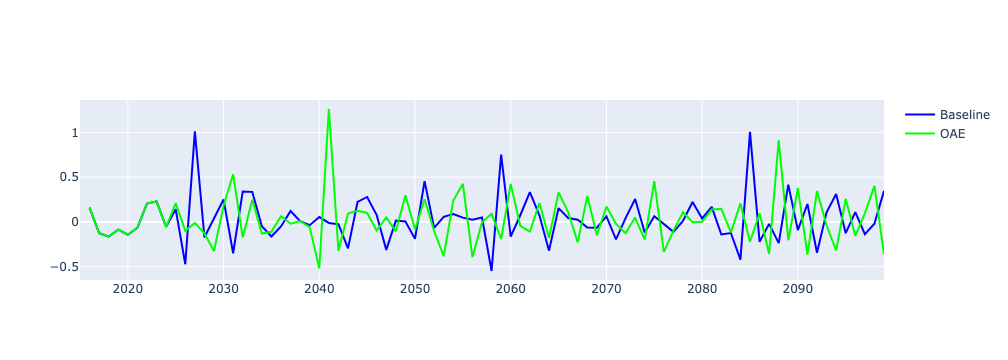

In [100]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ph_amplitude_baseline_pct.year, y=ph_amplitude_baseline_pct['ph'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=ph_amplitude_oae_pct.year, y=ph_amplitude_oae_pct['ph'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()